<a href="https://colab.research.google.com/github/Lemon-Aki/DeepLearningFromScratch1/blob/main/Chapter4-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#신경망 학습 절차
#학습 : 신경망에는 적응 가능한 매개변수(가중치와 편향)이 있고, 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정
#확률적 경사 하강법(Stochastic Gradient Descent, GSD) : 무직위로 선정한 미니배치에 대해 수행하는 경사 하강법
#1단계 : 미니배치
#훈련 데이터 중 일부 데이터(미니배치)를 무작위로 선정, 이 미니배치의 손실 함수 값을 줄이는 것이 목표
#2단계 : 기울기 산출
#미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구함, 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시
#3단계 : 매개변수 갱신
#가중치 매개변수를 기울기 방향으로 아주 조금 갱신
#4단계 : 1~3단계 반복 

In [1]:
#2층 신경망 클래스 구현하기(입력층 -> 은닉층 -> 출력층)
# 코랩과 구글드라이드를 연동(인증 필요)
#Transport endpoint is not connected 에러시 코랩 재연결
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
%cd /gdrive/MyDrive/DeepLearningFromScratch1/

Mounted at /gdrive
/gdrive/MyDrive/DeepLearningFromScratch1


In [11]:
import numpy as np
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
  #인스턴스 생성자
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    #가중치 초기화
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  #예측 메소드, 테스트 데이터와 행렬 곱연산 후 시그모이드 함수 통과
  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = sigmoid(a2)

    return y
  
  #손실 함수 메소드, 훈련 후 교차 엔트로피 오차를 통과(결과가 작은 값인 쪽이 정답일 가능성이 높음)
  def loss(self, x, t):
    y = self.predict(x)

    return cross_entropy_error(y, t)

  #정확도 메소드, 훈련 결과와 테스트 결과값이 일치한 확률을 표시
  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)

    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy

  #경사 하강법 메소드, 가중치 매개변수의 기울기를 구함
  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x, t)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads

net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

grads = net.numerical_gradient(x, t)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)
(784, 100)
(100,)
(100, 10)
(10,)


train acc, test acc | 0.10218333333333333, 0.101
train acc, test acc | 0.09035, 0.0892
train acc, test acc | 0.09035, 0.0892
train acc, test acc | 0.09035, 0.0892
train acc, test acc | 0.09035, 0.0892
train acc, test acc | 0.09035, 0.0892
train acc, test acc | 0.09545, 0.0946
train acc, test acc | 0.11215, 0.1134
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.10288333333333333, 0.1023
train acc, test acc | 0.09871666666666666, 0.098


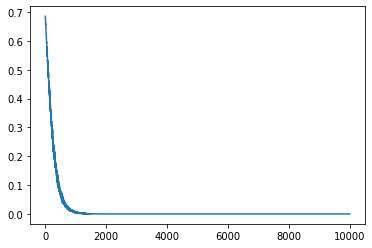

In [20]:
#미니배치 학습 구현
from dataset.mnist import load_mnist
(x_train, t_train),(x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

#1에포크 당 반복 수
iters_per_epoch = max(train_size / batch_size, 1)

#하이퍼 파라미터
iters_num = 10000   #반복 횟수
train_size = x_train.shape[0]   #60000개
batch_size = 100    #미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
  #미니배치 획득
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  #기울기 계산 - 윗 줄은 시간이 너무 오래걸려서 실행불가
  #grad = network.numerical_gradient(x_batch, t_batch)
  #grad = network.gradient(x_batch, t_batch)    #성능 개선용
  
  #매개변수갱신
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  #학습경과 기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

  #1에포크 당 정확도 계산
  if i % iters_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

import matplotlib.pyplot as plt

print_x = np.arange(0, iters_num, 1)
print_y = train_loss_list
plt.plot(print_x, print_y)
plt.show()